<a href="https://colab.research.google.com/github/onurozansunger/data_mining_practice/blob/main/Data_Mining_Outlier_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import seaborn as sns
df=sns.load_dataset("planets")

In [60]:
df.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [61]:
df=df.select_dtypes(include=["float64","int64"])

In [62]:
df.info

<bound method DataFrame.info of       number  orbital_period   mass  distance  year
0          1      269.300000   7.10     77.40  2006
1          1      874.774000   2.21     56.95  2008
2          1      763.000000   2.60     19.84  2011
3          1      326.030000  19.40    110.62  2007
4          1      516.220000  10.50    119.47  2009
...      ...             ...    ...       ...   ...
1030       1        3.941507    NaN    172.00  2006
1031       1        2.615864    NaN    148.00  2007
1032       1        3.191524    NaN    174.00  2007
1033       1        4.125083    NaN    293.00  2008
1034       1        4.187757    NaN    260.00  2008

[1035 rows x 5 columns]>

In [63]:
df.head(10)

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009
5,1,185.840,4.80,76.39,2008
6,1,1773.400,4.64,18.15,2002
7,1,798.500,NaN,21.41,1996
8,1,993.300,10.30,73.10,2008
9,2,452.800,1.99,74.79,2010


In [64]:
df_orbital=df["orbital_period"]

In [65]:
df_orbital.head(10)

0     269.300
1     874.774
2     763.000
3     326.030
4     516.220
5     185.840
6    1773.400
7     798.500
8     993.300
9     452.800
Name: orbital_period, dtype: float64

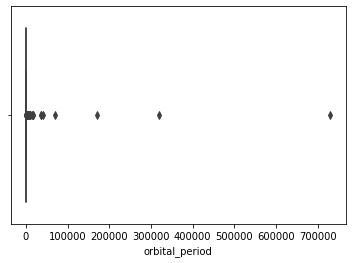

In [66]:
sns.boxplot(x=df_orbital)

In [67]:
Q1=df_orbital.quantile(0.25)
Q3=df_orbital.quantile(0.75)
IQR=Q3-Q1

In [68]:
low_limit=Q1-1.5*IQR

In [69]:
up_limit=Q3+1.5*IQR

In [70]:
outlier=(df_orbital<low_limit)|(df_orbital>up_limit)

In [71]:
df_orbital[outlier]

6        1773.4
14       2391.0
15      14002.0
19       4909.0
32      10220.0
         ...   
920      3500.0
921      1825.0
922      5100.0
937    730000.0
944     36525.0
Name: orbital_period, Length: 126, dtype: float64

Handling Outliers


In [72]:
#Remove

import pandas as pd
df_orbital=pd.DataFrame(df_orbital)

In [73]:
df_orbital.shape

(1035, 1)

In [74]:
df_without_outliers=df_orbital[~((df_orbital<low_limit)|(df_orbital>up_limit))]

In [75]:
df_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   orbital_period  866 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB


In [76]:
#Filling Mean
df_orbital.shape

(1035, 1)

In [77]:
df_orbital.mean()

orbital_period    2002.917596
dtype: float64

In [78]:
df_orbital[outlier]

,orbital_period
6,1773.4
14,2391.0
15,14002.0
19,4909.0
32,10220.0
...,...
920,3500.0
921,1825.0
922,5100.0
937,730000.0


In [79]:
df_orbital[outlier]=df_orbital.mean()

In [80]:
df_orbital[outlier]

,orbital_period
6,2002.917596
14,2002.917596
15,2002.917596
19,2002.917596
32,2002.917596
...,...
920,2002.917596
921,2002.917596
922,2002.917596
937,2002.917596


In [81]:
df_orbital=df["orbital_period"]

In [82]:
df_orbital[outlier]

6        1773.4
14       2391.0
15      14002.0
19       4909.0
32      10220.0
         ...   
920      3500.0
921      1825.0
922      5100.0
937    730000.0
944     36525.0
Name: orbital_period, Length: 126, dtype: float64

In [83]:
low_limit

-775.4011487500002

In [85]:
df_orbital[outlier]=low_limit

In [86]:
df_orbital[outlier]

6     -775.401149
14    -775.401149
15    -775.401149
19    -775.401149
32    -775.401149
          ...    
920   -775.401149
921   -775.401149
922   -775.401149
937   -775.401149
944   -775.401149
Name: orbital_period, Length: 126, dtype: float64